In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly_express as px
from importlib import reload

In [22]:
NOTEBOOK_DIR = os.getcwd()

### Load data

In [24]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris);

In [ ]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [ ]:
tree_clf.predict([[5, 1.5]])

array([1])

In [20]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file=os.path.join(NOTEBOOK_DIR, "output", "iris_tree.dot"),
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

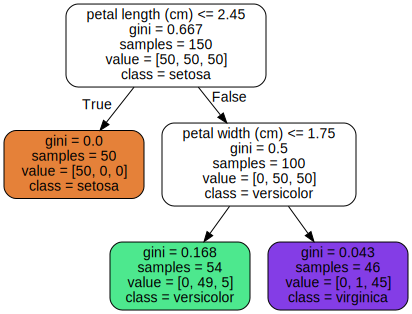

In [21]:
from graphviz import Source
Source.from_file(os.path.join(NOTEBOOK_DIR, "output", "iris_tree.dot"))

### Different method (not writing to file; just passing to output display)

In [44]:
mytree = export_graphviz(
    tree_clf,
    out_file=None,
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)
# https://stackoverflow.com/a/45533426

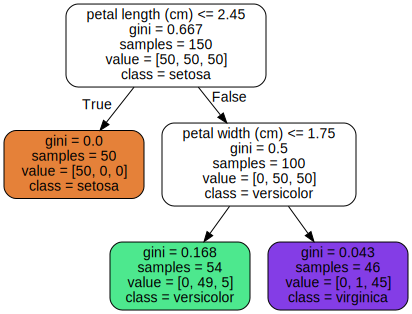

In [39]:
from IPython.display import SVG
graph = Source(mytree)
SVG(graph.pipe(format="svg"))

### Different method using builtin sklearn function (fill color doesn't work)

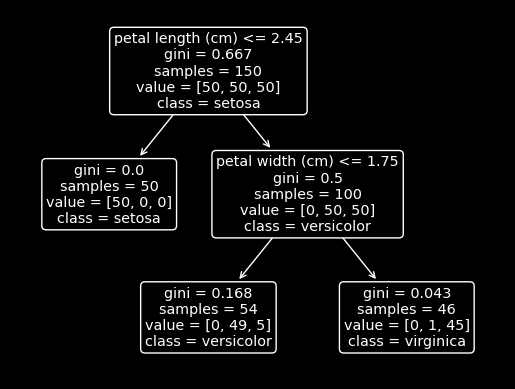

In [55]:
from sklearn.tree import plot_tree

plot_tree(
    tree_clf,
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    # filled=True
);
# https://stackoverflow.com/a/59517013

### Contrasting text colors to allow fill

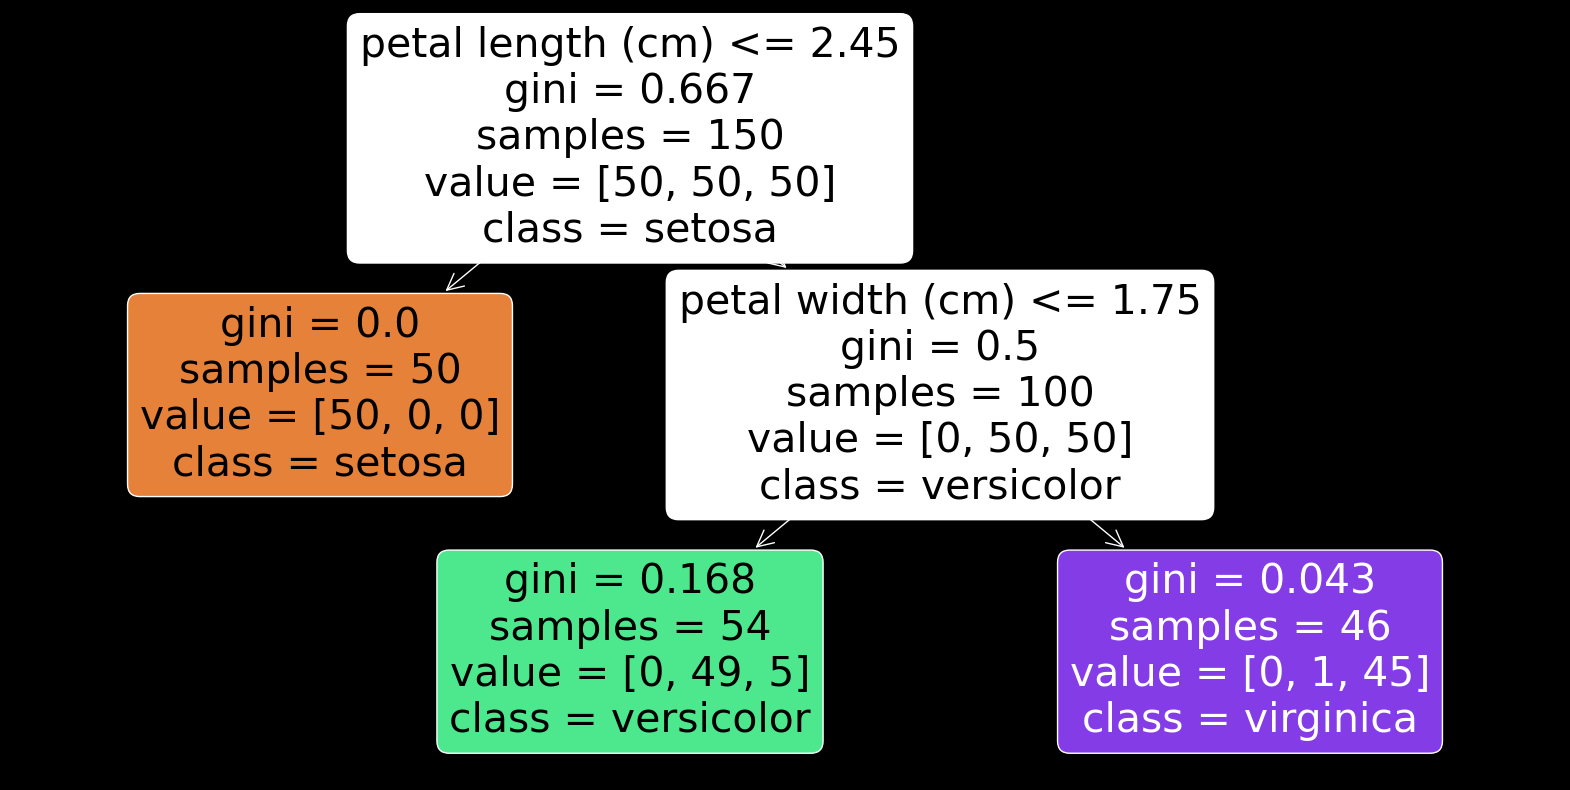

In [59]:
from sklearn.tree import plot_tree
import matplotlib.colors as mcolors

fig, ax = plt.subplots(figsize=(20,10))
plot_tree(
    tree_clf,
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True,
    ax=ax
);

def get_text_color(bg_color):
    rgb = mcolors.to_rgb(bg_color)
    luminance = 0.299 * rgb[0] + 0.587 * rgb[1] + 0.114 * rgb[2]
    return "white" if luminance < 0.5 else "black"

for text in ax.texts:
    bbox = text.get_bbox_patch()
    if bbox:
        bg_color = bbox.get_facecolor()
        text.set_color(get_text_color(bg_color))

# https://www.geeksforgeeks.org/changing-colors-for-decision-tree-plot-using-sklearn-plot-tree/

### ---

In [72]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

In [74]:
tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons);

In [76]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=43)
tree_clf1.score(X_moons_test, y_moons_test)

0.898

In [77]:
tree_clf2.score(X_moons_test, y_moons_test)

0.92